In [178]:
import pandas as pd
import numpy as np

In [179]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [180]:
!wget $data

--2025-10-08 22:59:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.7’

car_fuel_efficiency 100%[===================>] 853.70K  3.35MB/s    in 0.2s    

2025-10-08 22:59:10 (3.35 MB/s) - ‘car_fuel_efficiency.csv.7’ saved [874188/874188]



In [181]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [182]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [183]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [184]:
df['fuel_efficiency_mpg']

0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

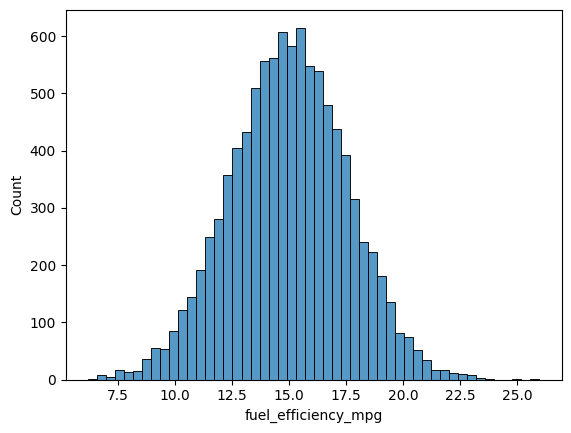

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df['fuel_efficiency_mpg'], bins = 50)

In [186]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [187]:
df.horsepower.median()

149.0

In [188]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val)
print(n_test)
print(n_train)

1940
1940
5824


In [189]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
3880,180,3.0,119.0,3582.745396,NaN,2012,USA,Diesel,Front-wheel drive,1.0,11.345737
3881,240,0.0,152.0,2892.395450,12.7,2019,Asia,Diesel,Front-wheel drive,0.0,15.994232
3882,290,3.0,152.0,3515.849661,12.6,2003,Asia,Gasoline,All-wheel drive,-1.0,12.600823
3883,170,5.0,121.0,2931.819348,16.2,2012,USA,Gasoline,Front-wheel drive,1.0,14.816853
3884,210,5.0,147.0,2614.520645,19.2,2008,Asia,Gasoline,Front-wheel drive,0.0,16.126712
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [190]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [191]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val + n_test]]
df_train = df.iloc[idx[n_val + n_test:]]
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
8064,70,NaN,87.0,3346.134219,12.7,2004,Europe,Diesel,Front-wheel drive,2.0,13.085351
6622,280,5.0,147.0,4193.817815,14.0,2017,USA,Gasoline,Front-wheel drive,1.0,9.385060
2155,240,4.0,137.0,2471.172629,14.9,2010,Asia,Diesel,Front-wheel drive,0.0,17.697460
8916,240,4.0,127.0,4044.606636,15.3,2000,Asia,Diesel,All-wheel drive,-2.0,9.298735
3274,280,5.0,NaN,3039.297482,13.8,2011,Europe,Gasoline,Front-wheel drive,2.0,14.724394
...,...,...,...,...,...,...,...,...,...,...,...
5734,210,2.0,163.0,1972.029124,14.4,2011,Europe,Diesel,All-wheel drive,1.0,19.961672
5191,160,4.0,126.0,3011.588014,16.4,2009,Europe,Diesel,All-wheel drive,-1.0,14.651056
5390,290,7.0,187.0,2440.508039,NaN,2019,USA,Gasoline,All-wheel drive,-1.0,18.404435
860,260,2.0,129.0,1865.404480,14.5,2019,Europe,Gasoline,Front-wheel drive,0.0,20.502460


In [192]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [193]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [194]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [195]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [196]:
#fill missing values with 0

In [197]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

In [198]:
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
0,70,87.0,3346.134219,2004
1,280,147.0,4193.817815,2017
2,240,137.0,2471.172629,2010
3,240,127.0,4044.606636,2000
4,280,NaN,3039.297482,2011
...,...,...,...,...
5819,210,163.0,1972.029124,2011
5820,160,126.0,3011.588014,2009
5821,290,187.0,2440.508039,2019
5822,260,129.0,1865.404480,2019


In [199]:
X_train = df_train[base].values
X_train

array([[  70.        ,   87.        , 3346.1342185 , 2004.        ],
       [ 280.        ,  147.        , 4193.81781457, 2017.        ],
       [ 240.        ,  137.        , 2471.17262896, 2010.        ],
       ...,
       [ 290.        ,  187.        , 2440.50803916, 2019.        ],
       [ 260.        ,  129.        , 1865.40447951, 2019.        ],
       [ 270.        ,  147.        , 2611.9394998 , 2017.        ]],
      shape=(5824, 4))

In [200]:
df_train[base].fillna(0).isnull().sum()
X_train = df_train[base].fillna(0).values

In [201]:
w0 , w = train_linear_regression(X_train, y_train)
w

array([-7.74840045e-06,  2.37025256e-04, -3.21769367e-04,  6.05350871e-05])

In [202]:
y_pred = w0 + X_train.dot(w)

In [203]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [204]:
rmse(y_train, y_pred).round(2)

np.float64(0.04)

In [205]:
df['engine_displacement'].value_counts().head(5)

engine_displacement
190    816
200    805
210    770
220    729
180    719
Name: count, dtype: int64

In [206]:
df['horsepower'].value_counts().head(10)

horsepower
152.0    142
145.0    141
151.0    134
148.0    130
141.0    130
143.0    128
159.0    126
149.0    124
136.0    123
139.0    123
Name: count, dtype: int64

In [207]:
df['vehicle_weight'].value_counts().head(10)

vehicle_weight
3413.433759    1
3149.664934    1
3079.038997    1
2542.392402    1
3460.870990    1
2484.883986    1
3006.542287    1
3638.657780    1
2714.219310    1
3509.036569    1
Name: count, dtype: int64

In [208]:
df['model_year'].value_counts().head(5)

model_year
2003    447
2002    446
2018    443
2004    440
2021    438
Name: count, dtype: int64

In [209]:
def prepare_X_missingfillzero(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.model_year
    features.append('age')
    
    for v in [190, 200, 210, 220, 180]:
        feature = 'engine_displacement_%s' % v
        df[feature] = (df['engine_displacement'] == v).astype(int)
        features.append(feature)

    for v in [152.0, 145.0, 151.0, 148.0, 141.0]:
        feature = 'horsepower_%s' % v
        df[feature] = (df['horsepower'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [210]:
X_train = prepare_X_missingfillzero(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred).round(2))

X_val = prepare_X_missingfillzero(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred).round(2))

train: 4.97
validation: 4.97


In [211]:
#fill missing values with mean 

In [212]:
mean = df_train.horsepower.mean()

In [213]:
mean

np.float64(149.7399667098206)

In [214]:
X_train = df_train[base].fillna(149.74).values
w0 , w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred).round(2)

np.float64(0.04)

In [215]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.model_year
    features.append('age')
    
    for v in [190, 200, 210, 220, 180]:
        feature = 'engine_displacement_%s' % v
        df[feature] = (df['engine_displacement'] == v).astype(int)
        features.append(feature)

    for v in [152.0, 145.0, 151.0, 148.0, 141.0]:
        feature = 'horsepower_%s' % v
        df[feature] = (df['horsepower'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(149.74)
    X = df_num.values
    return X

In [216]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred).round(2))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred).round(2))

train: 3.06
validation: 3.06


In [217]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [218]:
X_train = prepare_X_missingfillzero(df_train)
X_val = prepare_X_missingfillzero(df_val)

for r in [0, 0.01,  1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 4.967017558466718
  0.01 0.0391091332088276
     1 0.03910949180905838
     5 0.03911094260019729
    10 0.03911273736468165
   100 0.039134388776530055


In [219]:
val_rmses = []
for seed in [0,1,2,3,4,5,6,7,8,9]:

    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)
   
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_val = df.iloc[idx[:n_val]]
    df_test = df.iloc[idx[n_val:n_val + n_test]]
    df_train = df.iloc[idx[n_val + n_test:]]


    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    X_train = prepare_X_missingfillzero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_missingfillzero(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmse = rmse(y_val, y_pred).round(2)


    val_rmses.append(rmse)

In [220]:
val_rmses

[np.float64(0.44),
 np.float64(23.2),
 np.float64(0.41),
 np.float64(3.09),
 np.float64(4.42),
 np.float64(48.45),
 np.float64(0.19),
 np.float64(0.26),
 np.float64(76.25),
 np.float64(4.66)]

In [221]:
std = np.std(val_rmses)

In [233]:
std

np.float64(24.793028879102287)

In [234]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [235]:
df_full_train = pd.concat([df_train, df_val])

In [236]:
df_full_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,240,4.0,160.0,3039.489643,NaN,2009,Europe,Gasoline,Front-wheel drive,2.0,14.690559
1,310,1.0,205.0,4130.516967,17.0,2002,Europe,Gasoline,Front-wheel drive,0.0,9.484910
2,150,5.0,171.0,2624.729636,NaN,2023,Europe,Gasoline,All-wheel drive,-1.0,17.126861
3,130,4.0,124.0,1993.044305,13.3,2020,USA,Diesel,All-wheel drive,0.0,20.100569
4,90,11.0,144.0,2503.303379,NaN,2008,Asia,Diesel,Front-wheel drive,-1.0,17.513122
...,...,...,...,...,...,...,...,...,...,...,...
1935,190,5.0,203.0,3140.424556,17.2,2013,Asia,Diesel,All-wheel drive,0.0,15.008270
1936,170,4.0,215.0,3642.496270,16.2,2015,USA,Diesel,All-wheel drive,0.0,12.774800
1937,130,4.0,158.0,2766.726565,11.3,2017,Europe,Gasoline,Front-wheel drive,0.0,17.619505
1938,100,5.0,145.0,2988.474969,NaN,2017,USA,Diesel,Front-wheel drive,0.0,14.256185


In [237]:
X_full_train = df_full_train.fillna(0).values 

In [238]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = df_test
y_pred = w_0 + X_test.dot(w)
def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)

print('test:', rmse(y_test, y_pred))